## Monte Carlo Simulation ##

### Calculating pi ###

In [32]:
import random
import numpy as np

def estimate_pi(num_points):
    points_inside_circle = 0

    for _ in range(num_points):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)

        distance = x**2 + y**2
        if distance <= 1:
            points_inside_circle += 1

    return 4 * points_inside_circle / num_points

# Repeat the simulation 5 times for each number of points and compute the mean
num_points_list = [1000, 10000, 100000, 1000000]
num_simulations = 5

for num_points in num_points_list:
    pi_estimates = []
    for _ in range(num_simulations):
        estimated_pi = estimate_pi(num_points)
        pi_estimates.append(estimated_pi)
    
    mean_pi = np.mean(pi_estimates)
    print(f"Number of points: {num_points}, Mean Estimated Pi: {mean_pi}")


Number of points: 1000, Mean Estimated Pi: 3.1376
Number of points: 10000, Mean Estimated Pi: 3.1461599999999996
Number of points: 100000, Mean Estimated Pi: 3.1431200000000006
Number of points: 1000000, Mean Estimated Pi: 3.1416823999999997


### Mensch ###



In [41]:
import random

def play_game():
    positions = [-1, -1, -1, -1]  # Positions of players' pieces
    out_status = [1, 1, 1, 1]  # Out areas for each player
    start_fields = [0, 10, 20, 30]  # Start fields for each player
    players = [0, 1, 2, 3]  # Player IDs

    def move_piece(player, steps):
        current_position = positions[player]
        # if can_move(player, steps):
        new_position = (current_position + steps) % 40
        positions[player] = new_position
    
    def is_winner(player, steps):
        return (positions[player] + steps)%40 == start_fields[player] 
    
    def check_collision(player):
        current_position = positions[player]
        for other_player in players:
            if other_player != player and positions[other_player] == current_position and positions[other_player] != start_fields[other_player]:
                positions[other_player] = -1
                out_status[other_player] = 1
    
    # def can_move(player, steps):
    #     if (positions[player] + steps)%40 > start_fields[player] :
    #         return False
    #     return True

    while True:
        for player in players:
            dice_roll = random.randint(1, 6)

            if out_status[player] == 1 and dice_roll != 6:
                continue

            if out_status[player] == 1 and dice_roll == 6:
                positions[player] = start_fields[player]
                out_status[player] = 0
                check_collision(player)
                continue

            if not is_winner(player, dice_roll):
                move_piece(player, dice_roll)
                check_collision(player)
                continue

            if is_winner(player, dice_roll):
                print("player " + str(player) + " won!")
                return player

# Monte Carlo simulation
num_simulations = 10000
win_counts = [0, 0, 0, 0]

for _ in range(num_simulations):
    winner = play_game()
    win_counts[winner] += 1

total_games = sum(win_counts)
probabilities = [count / total_games for count in win_counts]

for player, prob in enumerate(probabilities):
    print(f"Player {player + 1}: Probability of winning - {prob:.4f}")



player 2 won!
player 2 won!
player 3 won!
player 2 won!
player 1 won!
player 1 won!
player 0 won!
player 3 won!
player 2 won!
player 0 won!
player 0 won!
player 2 won!
player 2 won!
player 0 won!
player 0 won!
player 1 won!
player 3 won!
player 2 won!
player 0 won!
player 0 won!
player 2 won!
player 1 won!
player 2 won!
player 0 won!
player 2 won!
player 1 won!
player 0 won!
player 1 won!
player 0 won!
player 0 won!
player 2 won!
player 3 won!
player 2 won!
player 0 won!
player 1 won!
player 3 won!
player 2 won!
player 0 won!
player 3 won!
player 2 won!
player 2 won!
player 1 won!
player 0 won!
player 1 won!
player 3 won!
player 0 won!
player 1 won!
player 2 won!
player 2 won!
player 2 won!
player 2 won!
player 2 won!
player 2 won!
player 2 won!
player 1 won!
player 0 won!
player 3 won!
player 0 won!
player 2 won!
player 0 won!
player 1 won!
player 2 won!
player 3 won!
player 1 won!
player 0 won!
player 0 won!
player 0 won!
player 2 won!
player 3 won!
player 0 won!
player 0 won!
player

## Central Limit Theorem(CLT) ##

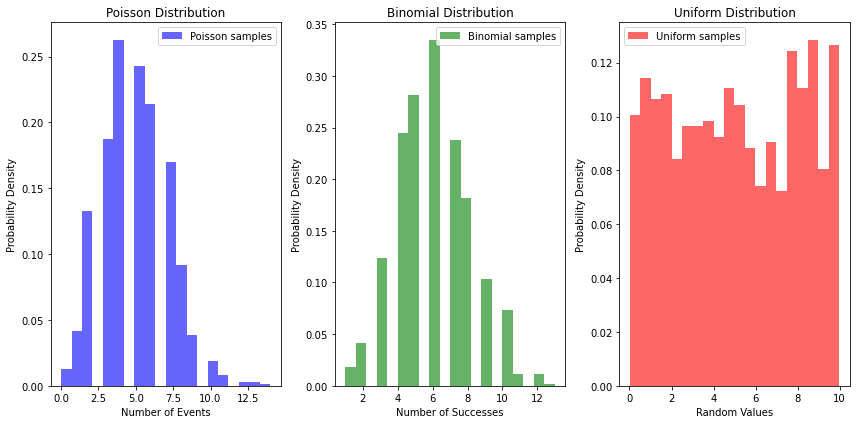

Poisson mean: 4.94
Binomial mean: 5.97
Uniform mean: 5.04


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the distributions
lambda_poisson = 5  # Mean rate for Poisson distribution
n_trials = 20  # Number of trials for Binomial distribution
p_binomial = 0.3  # Probability of success for Binomial distribution
low = 0  # Lower bound for Uniform distribution
high = 10  # Upper bound for Uniform distribution
sample_size = 1000  # Number of samples

# Generate random samples
poisson_samples = np.random.poisson(lambda_poisson, size=sample_size)
binomial_samples = np.random.binomial(n_trials, p_binomial, size=sample_size)
uniform_samples = np.random.uniform(low, high, size=sample_size)

# Calculate sample means
poisson_mean = np.mean(poisson_samples)
binomial_mean = np.mean(binomial_samples)
uniform_mean = np.mean(uniform_samples)

# Plot histograms
plt.figure(figsize=(12, 6))

# Poisson distribution
plt.subplot(131)
plt.hist(poisson_samples, bins=20, density=True, alpha=0.6, color='b', label='Poisson samples')
plt.xlabel('Number of Events')
plt.ylabel('Probability Density')
plt.title('Poisson Distribution')
plt.legend()

# Binomial distribution
plt.subplot(132)
plt.hist(binomial_samples, bins=20, density=True, alpha=0.6, color='g', label='Binomial samples')
plt.xlabel('Number of Successes')
plt.ylabel('Probability Density')
plt.title('Binomial Distribution')
plt.legend()

# Uniform distribution
plt.subplot(133)
plt.hist(uniform_samples, bins=20, density=True, alpha=0.6, color='r', label='Uniform samples')
plt.xlabel('Random Values')
plt.ylabel('Probability Density')
plt.title('Uniform Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# Print sample means
print(f"Poisson mean: {poisson_mean:.2f}")
print(f"Binomial mean: {binomial_mean:.2f}")
print(f"Uniform mean: {uniform_mean:.2f}")


## Hypothesis Testing ##



### Unfair Coin ###

In [39]:
import numpy as np
from scipy import stats

# Define the biased coin probabilities
prob_heads = 0.60
prob_tails = 0.40

# Define the null hypothesis (fair coin)
null_prob_heads = 0.5

# Define the significance level
alpha = 0.05

# Function to perform hypothesis testing using confidence interval
def hypothesis_testing_confidence_interval(sample_size):
    # Simulate coin flips
    coin_flips = np.random.choice(['Heads', 'Tails'], size=sample_size, p=[prob_heads, prob_tails])
    
    # Calculate the number of heads
    num_heads = np.sum(coin_flips == 'Heads')
     # Calculate z-score
    z_score = (num_heads - null_prob_heads * sample_size) / np.sqrt(sample_size * null_prob_heads * (1 - null_prob_heads))
    
    # Calculate p-value
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))
    
    # Make decision based on confidence interval
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"
    
    
    # Calculate confidence interval
    margin_of_error = 1.96 * np.sqrt(null_prob_heads * (1 - null_prob_heads) / sample_size)
    confidence_interval = (num_heads / sample_size - margin_of_error, num_heads / sample_size + margin_of_error)
    
   
    return confidence_interval, decision , z_score, p_value

# Perform hypothesis testing using confidence interval for different sample sizes
sample_sizes = [30, 100, 1000]
for sample_size in sample_sizes:
    confidence_interval, decision , z_score, p_value = hypothesis_testing_confidence_interval(sample_size)
    
    print(f"Sample Size: {sample_size}")
    print(f"Confidence Interval: {confidence_interval}")
    print(f"Z-Score: {z_score}")
    print(f"P-Value: {p_value}")
    print(f"Decision: {decision}")
    print()


Sample Size: 30
Confidence Interval: (0.45441063121497904, 0.8122560354516876)
Z-Score: 1.4605934866804429
P-Value: 0.1441270348160153
Decision: Fail to reject the null hypothesis

Sample Size: 100
Confidence Interval: (0.43200000000000005, 0.628)
Z-Score: 0.6
P-Value: 0.5485062355001471
Decision: Fail to reject the null hypothesis

Sample Size: 1000
Confidence Interval: (0.5930096789303498, 0.6549903210696502)
Z-Score: 7.842448597217581
P-Value: 4.440892098500626e-15
Decision: Reject the null hypothesis


### Job Placement(manual) ###


In [28]:
import pandas as pd
from scipy import stats
from scipy.stats import t
import math

# Read data from CSV file
data = pd.read_csv("job_placement.csv")

# Split students into two groups based on job placement status
working_students = data[data['placement_status'] == 'Placed']
non_working_students = data[data['placement_status'] == 'Not Placed']
working_grades = working_students['gpa']
non_working_grades = non_working_students['gpa']

# Calculate sample statistics
n1 = len(working_grades)
n2 = len(non_working_grades)
mean1 = working_grades.mean()
mean2 = non_working_grades.mean()
var1 = working_grades.var()
var2 = non_working_grades.var()

# Calculate the standard error and degrees of freedom
SE = math.sqrt(var1/n1 + var2/n2)
df = min(n1 - 1, n2 - 1)

# Calculate the t-statistic and p-value for a two-tailed test
T = (mean1 - mean2) / SE
p_value = (1 - t.cdf(T, df=df)) * 2

# Report the results
print(f"t-statistic: {T}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value}")

# Make decision based on significance level (α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Working alongside studying has a significant impact on grades.")
else:
    print("Fail to reject null hypothesis: There is no significant impact of working alongside studying on grades.")


t-statistic: 4.442633347556005
Degrees of freedom: 129
P-value: 1.891866696746014e-05
Reject null hypothesis: Working alongside studying has a significant impact on grades.


### Job Placement(library) ###

In [30]:
from scipy.stats import ttest_ind
import pandas as pd

# Read data from CSV file
data = pd.read_csv("job_placement.csv")

# Split students into two groups based on job placement status
working_students = data[data['placement_status'] == 'Placed']
non_working_students = data[data['placement_status'] == 'Not Placed']
working_grades = working_students['gpa']
non_working_grades = non_working_students['gpa']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(working_grades, non_working_grades)

# Output the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Working alongside studying has a significant impact on grades.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of working alongside studying on grades.")


t-statistic: 5.105318956468754
p-value: 4.263644494096789e-07
Reject null hypothesis: Working alongside studying has a significant impact on grades.
